In [1]:
import sympy as sp

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sympy.physics.units.quantities as sq

In [5]:
import unicodedata as ud

In [6]:
well_length = sq.Symbol( 'L', nonzero=True, positive=True )
highest_potential = sq.Symbol( "V_max", nonzero=True, positive=True )
x = sp.Symbol( 'x', positive=True )
m = sq.Quantity( 'm', positive=True, nonzero=True )
hbar = sq.Quantity( "hbar" )
total_energy = sq.Symbol( 'E', nonzero=True, positive=True )
inverse_total_energy = 1.0 / total_energy
psi_symbol = ud.lookup( "GREEK SMALL LETTER PSI" )
psi = sp.Function( "psi" )
normalization_constant = sq.Symbol( 'A', nonzero=True )
C1 = sp.Symbol( "C1")#, nonzero=True )
C2 = sp.Symbol( "C2")#, nonzero=True )
k = sp.Symbol("k", nonzero=True)

In [7]:
potential_energy = sp.Piecewise( ( highest_potential, x <= 0 ), ( 0, x < well_length ), ( highest_potential, x >= well_length ) )

In [8]:
second_derivative = sp.Derivative( psi( x ), x, 2 )
make_shrodinger_left = lambda potential, psi_parameter : ( ( -( hbar ** 2 ) / ( 2 * m ) ) * second_derivative + ( psi( psi_parameter ) * potential ) )
make_shrodinger_right = lambda psi_parameter : total_energy * psi( psi_parameter )
make_psi_equal = lambda input_value, value : sp.Eq( psi( sp.Eq( x, input_value ) ), value )
set_equal = lambda to_set, value : sp.Eq( to_set, value )
both_sides = lambda equation, opreation : sp.Eq( opreation( equation.lhs ), opreation( equation.rhs ) )

In [9]:
shrodinger_left_high = sp.simplify( make_shrodinger_left( highest_potential, x ) )
shrodinger_left_low = sp.simplify( make_shrodinger_left( 0, x ) )
shrodinger_left = sp.simplify( make_shrodinger_left( potential_energy, x ) )
shrodinger_right = make_shrodinger_right( x )
shrodinger = sp.simplify( sp.Eq( shrodinger_left, shrodinger_right ) )
shrodinger_zero = sp.simplify( sp.Eq( shrodinger_left - shrodinger_right, 0 ) )
shrodinger_low_zero = sp.Eq( shrodinger_left_low - shrodinger_right, 0 )
shrodinger_low_zero_hand = sp.Eq( second_derivative + ( ( 2 * total_energy * m ) / ( hbar ** 2 ) ) * psi( x ), 0 )
shrodinger_low_zero_ksq = sp.Eq( second_derivative + ( ( k ** 2 ) * psi( x ) ), 0 )

k_sq = sp.Eq( k ** 2, ( ( 2 * total_energy * m ) / ( hbar ** 2 ) ) )

In [10]:
make_normalization_left = lambda psi_function : sp.integrate( psi_function * sp.conjugate( psi_function ), ( x, 0, well_length ) )
make_normalization = lambda psi_function : sp.Eq( normalization_left( psi_function ), 1 )
normalization_left = make_normalization_left( psi( x ) )
normalization = sp.Eq( normalization_left, 1 )

In [11]:
shrodinger_low_zero = sp.Eq( -( ( shrodinger_low_zero.lhs * 2*m ).simplify() / ( hbar ** 2 ) ).simplify(), 0 )

In [12]:
normalization

Eq(Integral(psi(x)*conjugate(psi(x)), (x, 0, L)), 1)

In [13]:
shrodinger_low_zero

Eq(Derivative(psi(x), (x, 2)) + 2*m*E*psi(x)/hbar**2, 0)

In [14]:
shrodinger_low_zero_ksq

Eq(k**2*psi(x) + Derivative(psi(x), (x, 2)), 0)

In [15]:
diff_sol = sp.solvers.ode.dsolve( shrodinger_low_zero_ksq, psi( x ), ivar = x )
#ics = { psi( 0 ): 0, psi( well_length ): 0 }

In [16]:
diff_sol

Eq(psi(x), C1*sin(x*Abs(k)) + C2*cos(k*x))

In [17]:
boundries = [
        sp.Eq( diff_sol.rhs.subs( x, 0 ), 0 ), 
        sp.Eq( diff_sol.rhs.subs( x, well_length ), 0 )
    ]

In [18]:
boundries[ 0 ]

Eq(C2, 0)

In [19]:
boundries[ 1 ]

Eq(C1*sin(L*Abs(k)) + C2*cos(L*k), 0)

In [20]:
boundry_applied = diff_sol.subs( C2, 0 )

In [21]:
boundry_applied

Eq(psi(x), C1*sin(x*Abs(k)))

In [22]:
particular_appled = boundries[ 1 ].subs( boundries[ 0 ].lhs, boundries[ 0 ].rhs )

In [23]:
particular_appled

Eq(C1*sin(L*Abs(k)), 0)

In [24]:
assume_c1_not_zero = sp.Eq( particular_appled.lhs.as_two_terms()[ 1 ], particular_appled.rhs )

In [25]:
assume_c1_not_zero

Eq(sin(L*Abs(k)), 0)

In [26]:
new_normalization = sp.Eq( make_normalization_left( boundry_applied.rhs ), 1 )

In [27]:
new_normalization

Eq(C1*(L*k/2 - sin(L*k)*cos(L*k)/2)*conjugate(C1)/k, 1)

In [28]:
new_normalization.refine( assume_c1_not_zero )

Eq(C1*(L*k/2 - sin(L*k)*cos(L*k)/2)*conjugate(C1)/k, 1)

In [29]:
sp.solve( new_normalization.simplify(), C1 )[ 0 ]

-2*sqrt(k/(2*L*k - sin(2*L*k)))

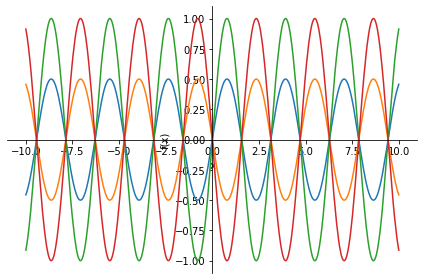

In [30]:
# Lets see if we can get an identity out of here
sp.plot( 
        sp.sin( x ) * sp.cos( x ), 
        sp.sin( -x ) * sp.cos( -x ), 
        sp.sin( 2 * x ), 
        sp.sin( -2 * x ) 
    )

In [33]:
new_normalization.simplify()

Eq(C1*(L*k - sin(2*L*k)/2)*conjugate(C1)/(2*k), 1)

In [35]:
ref = {}
ref[ 0 ] = new_normalization.simplify().refine( k_sq )

In [36]:
ref[ 0 ]

Eq(C1*(L*k - sin(2*L*k)/2)*conjugate(C1)/(2*k), 1)

In [ ]:
assume_c1_not_zero.refine(k_sq)

In [ ]:
k_val = sp.sqrt( k_sq.rhs )
ref_sub = new_normalization.simplify().subs(k, k_val ).refine( assume_c1_not_zero.subs( k, k_val ) )

In [ ]:
assume_c1_not_zero_refine = assume_c1_not_zero.refine( k > 0 )

In [ ]:
assume_c1_not_zero_refine